###                                                                                                                                              classification notebook
**Present by:   Daniel kula**

In [5]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
import csv
from sklearn.svm import SVC
import pandas as pd
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
from tkinter import messagebox
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from matplotlib import style
style.use("ggplot")


**part 1: KNN**

In [6]:
df =pd.read_csv(r"C:\Users\user\Desktop\דניאל\דניאל לימודים\אוניברסיטה\עבודת גמר\classification-diabetes.csv")
df.sample(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
484,0,145,0,0,0,44.2,0.630,31,1
716,3,173,78,39,185,33.8,0.970,31,1
258,1,193,50,16,375,25.9,0.655,24,0
40,3,180,64,25,70,34.0,0.271,26,0
86,13,106,72,54,0,36.6,0.178,45,0
697,0,99,0,0,0,25.0,0.253,22,0
425,4,184,78,39,277,37.0,0.264,31,1
758,1,106,76,0,0,37.5,0.197,26,0
628,5,128,80,0,0,34.6,0.144,45,0
214,9,112,82,32,175,34.2,0.260,36,1


In [7]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.75,test_size=0.25, random_state=101)
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print (“X_test:  ", x_test)
print ("y_test:  ", y_test)
       
X_train:  [4, 9, 3, 5, 7, 6, 1]
y_train:  [16, 81, 9, 25, 49, 36, 1]
X_test:  [8, 2, 0]
y_test:  [64, 4, 0]

SyntaxError: invalid character in identifier (<ipython-input-7-41f92576504f>, line 5)

In [ ]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
#pima = pd.read_csv(df, header=None, names=col_names)
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
#X = pima[feature_cols]
#y = pima.label
erorr

In [8]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = df
x_train, x_test = train_test_split(x, random_state=0)
x_test.shape
x_test.head()
x_train.shape

(576, 9)

In [9]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_cols]
y = df.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31


In [ ]:
k_range = list(range(1, 692))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

In [ ]:
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('value of k for KNN')
plt.ylabel('cross-validated Accuracy')
plt.title('1st graph KNN')

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
y_pred_class = logreg.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC 1')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

###  As we see the model is unstable and we need to add, lower or change values to be more accurate 

In [ ]:

heatmap_data = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Relationship between parameters and result', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

### We added a heat map showing parameters that have little to do with the outcome

In [ ]:
feature_cols2 = ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X2 = df[feature_cols2]
y2 = df.Outcome
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0)
X2_test.head()

### I decide drop off the "Blood Pressure" parameter because it has the least effect on the outcome.

In [ ]:
All_the_num_of_K = np.linspace(1,691,691)
v_reshaped = All_the_num_of_K.reshape(1,691)


In [ ]:
k_range2 = list(range(1, 692))
k_scores2 = []
for k in k_range:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    scores2 = cross_val_score(knn2, X2, y2, cv=10, scoring='accuracy')
    k_scores2.append(scores2.mean())

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
print(cross_val_score(knn, X2, y2, cv=10, scoring='accuracy').mean())

In [ ]:
%matplotlib inline

plt.plot(k_range2, k_scores2)
plt.xlabel('value of k for KNN')
plt.ylabel('cross-validated Accuracy')
plt.title('2nd graph KNN')

### The graph becomes more stable but more possible

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC 2')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
feature_cols3 = ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X3 = df[feature_cols3]
y3 = df.Outcome
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=0)

### I decided to drop off the 'skin thickness' parameter because it has the least effect on the result

In [ ]:
k_range3 = list(range(1, 692))
k_scores3 = []
for k in k_range:
    knn3 = KNeighborsClassifier(n_neighbors=k)
    scores3 = cross_val_score(knn3, X3, y3, cv=10, scoring='accuracy')
    k_scores3.append(scores3.mean())

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
print(cross_val_score(knn, X3, y3, cv=10, scoring='accuracy').mean())

In [ ]:
%matplotlib inline

plt.plot(k_range3, k_scores3)
plt.xlabel('value of k for KNN')
plt.ylabel('cross-validated Accuracy')
plt.title('3rd graph KNN')

### As you can see the graph has become more stable

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
plt.plot(k_range, k_scores, label = "original_graph")
plt.plot(k_range2, k_scores2, label = "without_Blood Pressure")
plt.plot(k_range3, k_scores3, label = "without_Blood Pressure_and_skin thickness")
plt.title('Combain of the 3 graphs')
plt.legend()
plt.show

### Here we see that the highest level of accuracy is in the blue line (in the original model) but if we look at the continuation of the model in a graph that we did not enlarge on a specific area - the most accurate local "combination of 3 graphs" then go for the above command but if we are looking for the exact model In some more cases we will go for the green

In [ ]:
#print(k_range3)
v_reshaped = k_range3.reshape(1,691)

In [ ]:
listi = list(range(1, 250))
k_range = listi
k_scores = []


In [ ]:
listi = list(range(1, 51))
k_range = listi
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
k_range2 = listi
k_scores2 = []
for k in k_range:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    scores2 = cross_val_score(knn2, X2, y2, cv=10, scoring='accuracy')
    k_scores2.append(scores2.mean())
k_range3 = listi
k_scores3 = []
for k in k_range:
    knn3 = KNeighborsClassifier(n_neighbors=k)
    scores3 = cross_val_score(knn3, X3, y3, cv=10, scoring='accuracy')
    k_scores3.append(scores3.mean())

In [ ]:
plt.plot(k_range, k_scores, label = "original_graph")
plt.plot(k_range2, k_scores2, label = "without_Blood Pressure")
plt.plot(k_range3, k_scores3, label = "without_Blood Pressure_and_skin thickness")
plt.title('Combain of the 3 graphs in zoom-in')
plt.legend()
plt.show

### Same graph, up close

# part 2: linear regression and svc

(576, 1)

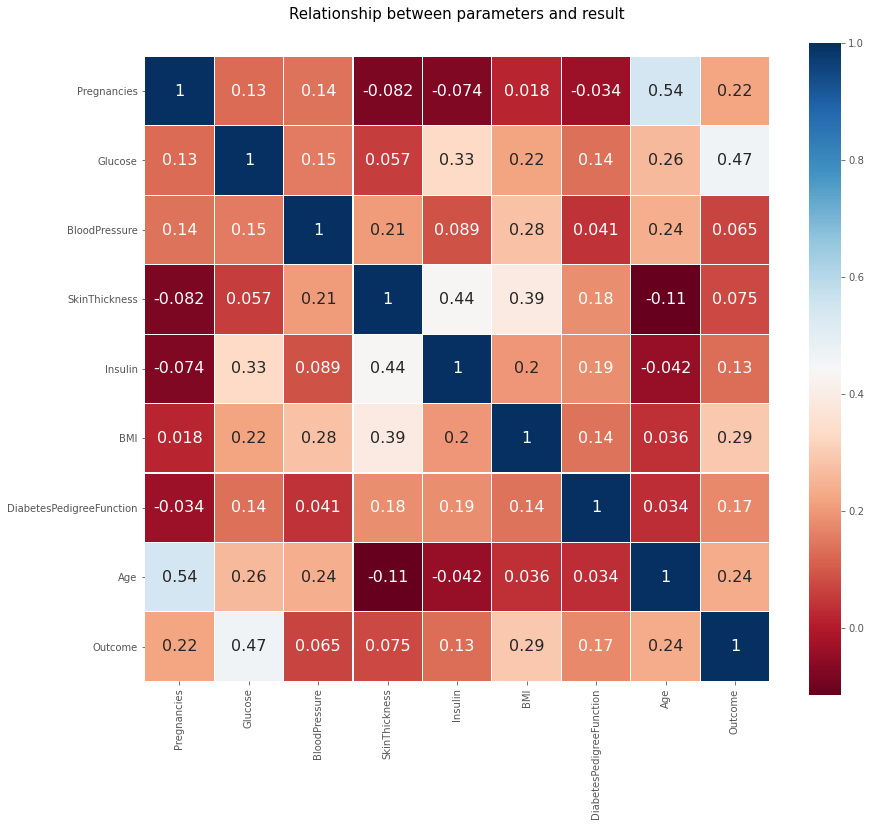

In [10]:
feature_cols = ['Glucose']
x=df[feature_cols]
x_train, x_test = train_test_split(x, random_state=0)


heatmap_data = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Relationship between parameters and result', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data
x_train.shape

In [ ]:
X = [[0, 0], [1, 576]]

array = [0, 1]
clf = svm.SVC()
clf.fit(X, y)
SVC()
np.ndarray

In [ ]:
clf.predict([[2., 2.]])
array[1]

In [ ]:
clf.support_vectors_
#array [int[0., 0.],[1., 1.]]
clf.support_
([0, 1])
clf.n_support_
#array (int[1, 1])


In [ ]:
>>> # get support vectors
>>> clf.support_vectors_
array[[0., 0.],
       [1., 1.]]
>>> # get indices of support vectors
>>> clf.support_
array([0, 1])
>>> # get number of support vectors for each class
>>> clf.n_support_
array([1, 1])


In [ ]:
x_train=(x_train/100)
plt.scatter(x_train,y_train)
plt.show
y = (iris["target"] == 2).astype(np.int) 

In [ ]:
list(df.keys())
X = x_train
y = y_train
log_reg = LogisticRegression()
log_reg.fit(X, y)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
log_reg.predict([[1.7], [1.5]])



###  As we see the model divides the graph into 2 and looks like this

In [ ]:
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X)
y_probi=clf.predict_proba(X)
clf.score(X, y)

### And we have no option to increase the accuracy because there are no parameters to delete

In [ ]:
list(df.keys())
X = x_train
y = y_probi
y.reshape(-1, 1)
log_reg = LogisticRegression()
log_reg.fit(X, y)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
log_reg.predict([[1.7], [1.5]])



In [11]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred_class = logreg.predict(X_test)
y_pred_class = logreg.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[119  11]
 [ 25  37]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
